<a href="https://colab.research.google.com/github/Gulshan979/deep_learning/blob/main/Deep_Tutorial_1_ANN_and_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import kagglehub
shrutimechlearn_churn_modelling_path = kagglehub.dataset_download('shrutimechlearn/churn-modelling')

print('Data source import complete.')


100%|██████████| 262k/262k [00:00<00:00, 435kB/s]

Extracting files...
Data source import complete.


## Introduction

* [What are ANNs?](#1)
* [Types of NNs?](#2)
* [Is there a difference between NN and ANN?](#3)
* [In what situation does the algorithm fit best?](#4)
* [How does ANN work?](#5)
* [Activation Function](#6)
* [What happens without activation function?](#7)
* [How are NNs different from classical models?](#8)
* [Implementation](#9)
* [Business Problem and EDA](#10)
* [Evaluation Metrics](#11)
* [Evaluation of Multiple Training Instances](#12)
* [Improving the ANN with dropout layer](#13)
* [Tuning the ANN](#14)

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import keras
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


# Any results you write to the current directory are saved as output.

<a id="1"></a>
# 1. What are ANNs?

#### Artificial neural networks are one of the main tools used in machine learning. As the “neural” part of their name suggests, they are brain-inspired systems which are intended to replicate the way that we humans learn. Neural networks consist of input and output layers, as well as (in most cases) a hidden layer consisting of units that transform the input into something that the output layer can use. ANNs have three layers that are interconnected. The first layer consists of input neurons. Those neurons send data on to the second layer, which in turn sends the output neurons to the third layer. ANNs are considered non-linear statistical data modeling tools where the complex relationships between inputs and outputs are modeled or patterns are found. Note that a neuron can also be referred to as a perceptron.

Note: The way layers would be created, arranged, assigned, number of neurons the layers would hold and other such questions come under architecture designing for neural networks. It is a common thing while starting out to have these queries. Architecture of NNs is an ocean frankly, one can gain knowledge of it only by exploring it, working on different problems optimising for better solutions by trial and error. There are some thumb rules that are known but since the complexity of the mechanism is such there are a very few detailed proofs of why some things work for some problems and some don't.

![](https://icdn6.digitaltrends.com/image/artificial_neural_network_1-720x720.jpg)

#### For a basic idea of how a deep learning neural network learns, imagine a factory line. After the raw materials (the data set) are input, they are then passed down the conveyer belt, with each subsequent stop or layer extracting a different set of high-level features. If the network is intended to recognize an object, the first layer might analyze the brightness of its pixels. The next layer could then identify any edges in the image, based on lines of similar pixels. After this, another layer may recognize textures and shapes, and so on. By the time the fourth or fifth layer is reached, the deep learning net will have created complex feature detectors. It can figure out that certain image elements (such as a pair of eyes, a nose, and a mouth) are commonly found together.

#### Once this is done, the researchers who have trained the network can give labels to the output, and then use backpropagation to correct any mistakes which have been made. After a while, the network can carry out its own classification tasks without needing humans to help every time.

<a id="2"></a>
# 2. Types of Neural Network

#### There are multiple types of neural network, each of which come with their own specific use cases and levels of complexity. The most basic type of neural net is something called a feedforward neural network, in which information travels in only one direction from input to output. A more widely used type of network is the recurrent neural network, in which data can flow in multiple directions. These neural networks possess greater learning abilities and are widely employed for more complex tasks such as learning handwriting or language recognition.

#### There are also convolutional neural networks, Boltzmann machine networks, Hopfield networks, and a variety of others. Picking the right network for your task depends on the data you have to train it with, and the specific application you have in mind. In some cases, it may be desirable to use multiple approaches, such as would be the case with a challenging task like voice recognition.

![](https://i.stack.imgur.com/LgmYv.png)

<a id="3"></a>
# 3. Is there a difference between NN and ANN?
#### Neural Network is a broad term that encompases various types of networks which were shown above. Is ANN one of the types? Well to understand this it is important to realise that neural network alone is not an algorithm but a framework which assists the algorithms to work. ANN is the most basic type of implementation of neurals. ANN was the term coined much earlier and nowadays the two terms are interchangeably used.


<a id="4"></a>
# 4. In what situation does the algorithm fit best?

#### ANN is rarely used for predictive modelling. The reason being that Artificial Neural Networks (ANN) usually tries to over-fit the relationship. ANN is generally used in cases where what has happened in past is repeated almost exactly in same way. For example, say we are playing the game of Black Jack against a computer. An intelligent opponent based on ANN would be a very good opponent in this case (assuming they can manage to keep the computation time low). With time ANN will train itself for all possible cases of card flow. And given that we are not shuffling cards with a dealer, ANN will be able to memorize every single call. Hence, it is a kind of machine learning technique which has enormous memory. But it does not work well in case where scoring population is significantly different compared to training sample. For instance, if I plan to target customer for a campaign using their past response by an ANN. I will probably be using a wrong technique as it might have over-fitted the relationship between the response and other predictors.

<a id="5"></a>
# 5. How does ANN work?
#### It is truly said that the working of ANN takes its roots from the neural network residing in human brain. ANN operates on something referred to as Hidden State. These hidden states are similar to neurons. Each of these hidden state is a transient form which has a probabilistic behavior. A grid of such hidden state act as a bridge between the input and the output.
#### We have an input layer which is the data we provide to the ANN. We have the hidden layers, which is where the magic happens. Lastly, we have the output layer, which is where the finished computations of the network are placed for us to use.





![](http://cdn-images-1.medium.com/max/600/1*f0hA2R652htmc1EaDrgG8g.png)

#### Initially the weights of the network can be randomly. When the input in given to the input layer the process moves forward and the hidden layer receives the input combined with the weights. This process goes on till the final layer of output is reached and result is given. When the result is out it is compared to the actual value and a back propagation algorithm comes into play to adjust the weights of the network linkages to better the result. What do the neurons in the layers then do? They are responsible for the learning individually. They consist of activation function that allows the signal to pass or not depending on which activation function is being used and what input came from the previous layer. We'll see activation functions in detail now.

![](http://www.analyticsvidhya.com/blog/wp-content/uploads/2014/10/flowchart-ANN.png)

<a id="6"></a>
# 6. Activation Function
#### Activation functions are really important for a Artificial Neural Network to learn and make sense of something really complicated and Non-linear complex functional mappings between the inputs and response variable.They introduce non-linear properties to our Network.Their main purpose is to convert a input signal of a node in a A-NN to an output signal. That output signal now is used as a input in the next layer in the stack.

#### Specifically in A-NN we do the sum of products of inputs(X) and their corresponding Weights(W) and apply a Activation function f(x) to it to get the output of that layer and feed it as an input to the next layer.



#### Most popular types of Activation functions -
* Sigmoid or Logistic
* Tanh — Hyperbolic tangent
* ReLu -Rectified linear units

**Sigmoid Activation function**: It is a activation function of form f(x) = 1 / 1 + exp(-x) . Its Range is between 0 and 1. It is a S — shaped curve. It is easy to understand and apply but it has major reasons which have made it fall out of popularity -

* Vanishing gradient problem
* Secondly , its output isn’t zero centered. It makes the gradient updates go too far in different directions. 0 < output < 1, and it makes optimization harder.
* Sigmoids saturate and kill gradients.
* Sigmoids have slow convergence.


![](http://cdn-images-1.medium.com/max/1600/0*WYB0K0zk1MiIB6xp.png)



**Hyperbolic Tangent function- Tanh** : It’s mathamatical formula is f(x) = 1 — exp(-2x) / 1 + exp(-2x). Now it’s output is zero centered because its range in between -1 to 1 i.e -1 < output < 1 . Hence optimization is easier in this method hence in practice it is always preferred over Sigmoid function . But still it suffers from Vanishing gradient problem.


![](http://cdn-images-1.medium.com/max/1600/0*VHhGS4NwibecRjIa.png)

**ReLu- Rectified Linear units** : It has become very popular in the past couple of years. It was recently proved that it had 6 times improvement in convergence from Tanh function. It’s just R(x) = max(0,x) i.e if x < 0 , R(x) = 0 and if x >= 0 , R(x) = x. Hence as seeing the mathamatical form of this function we can see that it is very simple and efficinent . A lot of times in Machine learning and computer science we notice that most simple and consistent techniques and methods are only preferred and are best. Hence it avoids and rectifies vanishing gradient problem . Almost all deep learning Models use ReLu nowadays.

But its limitation is that it should only be used within Hidden layers of a Neural Network Model.

Hence for output layers we should use a Softmax function for a Classification problem to compute the probabilites for the classes , and for a regression problem it should simply use a linear function.

Another problem with ReLu is that some gradients can be fragile during training and can die. It can cause a weight update which will makes it never activate on any data point again. Simply saying that ReLu could result in Dead Neurons.

To fix this problem another modification was introduced called Leaky ReLu to fix the problem of dying neurons. It introduces a small slope to keep the updates alive.

We then have another variant made form both ReLu and Leaky ReLu called Maxout function .

![](http://cdn-images-1.medium.com/max/1600/0*qtfLu9rmtNullrVC.png)

<a id="7"></a>
# 7. What happens without activation function?
#### If we do not apply a Activation function then the output signal would simply be a simple linear function.A linear function is just a polynomial of one degree. Now, a linear equation is easy to solve but they are limited in their complexity and have less power to learn complex functional mappings from data. A Neural Network without Activation function would simply be a Linear regression Model, which has limited power and does not performs good most of the times. We want our Neural Network to not just learn and compute a linear function but something more complicated than that. Also without activation function our Neural network would not be able to learn and model other complicated kinds of data such as images, videos , audio , speech etc. That is why we use Artificial Neural network techniques such as Deep learning to make sense of something complicated ,high dimensional,non-linear -big datasets, where the model has lots and lots of hidden layers in between and has a very complicated architecture which helps us to make sense and extract knowledge form such complicated big datasets.

<a id="8"></a>
# 8. How are NNs different from classical models?
#### To better understand artificial neural computing it is important to know first how a conventional 'serial' computer and it's software process information. A serial computer has a central processor that can address an array of memory locations where data and instructions are stored. Computations are made by the processor reading an instruction as well as any data the instruction requires from memory addresses, the instruction is then executed and the results are saved in a specified memory location as required. In a serial system (and a standard parallel one as well) the computational steps are deterministic, sequential and logical, and the state of a given variable can be tracked from one operation to another.

#### In comparison, ANNs are not sequential or necessarily deterministic. There are no complex central processors, rather there are many simple ones which generally do nothing more than take the weighted sum of their inputs from other processors. ANNs do not execute programed instructions; they respond in parallel (either simulated or actual) to the pattern of inputs presented to it. There are also no separate memory addresses for storing data. Instead, information is contained in the overall activation 'state' of the network. 'Knowledge' is thus represented by the network itself, which is quite literally more than the sum of its individual components.

<a id='9'></a>
# 9. Implementation

#### A brief about the NN libraries:
#### Theano is an open source numerical computation library based on numpy syntax. It can run not only on the CPU ( Central Processing Unit) but also the GPU (Graphical Processing Unit). GPU is a processor for graphic purposes somewhat similar to a graphic card. GPU is much more powerful in terms of efficiency etc. because it has more cores and is able to run more floating points calculations per second than the CPU. GPU is highly specialised for heavy, parallel computations which is a requirement in Neural Networks that we are about to see.
#### How parallel computation comes into play in NNs? When we are forward propagating the different activations of neurons for the activation function or when we back propagate the error. Also calculations can be carried out faster this way. Theano was developed at the University of Montreal.

#### Tensorflow is similar to Theano. It's been developed by Google.

#### However the point to consider is that these two libraries are more towards the research and development side of Neural Networks. If we were to create a model from scratch and make some improvements in it, experiment or something these two would be great but right now we would be using Keras for beginning till we step up. Keras in some way wraps the two libraries for us and provides small and easy to implement modules of code.

<a id='10'></a>
# 10. Business Problem and EDA

#### Our Business problem which I have chosen for this tutorial is a classification problem wherein we have a dataset in which there are details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.

In [3]:
# Importing the dataset
# The dataset was downloaded using kagglehub in a previous cell.
# The path to the downloaded dataset is returned by the kagglehub.dataset_download function.
churn_data = pd.read_csv(shrutimechlearn_churn_modelling_path + '/Churn_Modelling.csv',index_col='RowNumber')

In [4]:
churn_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10000 entries, 1 to 10000
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10000 non-null  int64  
 1   Surname          10000 non-null  object 
 2   CreditScore      10000 non-null  int64  
 3   Geography        10000 non-null  object 
 4   Gender           10000 non-null  object 
 5   Age              10000 non-null  int64  
 6   Tenure           10000 non-null  int64  
 7   Balance          10000 non-null  float64
 8   NumOfProducts    10000 non-null  int64  
 9   HasCrCard        10000 non-null  int64  
 10  IsActiveMember   10000 non-null  int64  
 11  EstimatedSalary  10000 non-null  float64
 12  Exited           10000 non-null  int64  
dtypes: float64(2), int64(8), object(3)
memory usage: 1.1+ MB


In [5]:
churn_data.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [6]:
churn_data.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,,,
1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
# some columns are totally unproductive so let's remove them
churn_data.drop(['CustomerId','Surname'],axis=1,inplace=True)

In [8]:
churn_data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
RowNumber,,,,,,,,,,,
1,619,France,Female,42,2,0.00,1,1,1,101348.88,1
2,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
3,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
4,699,France,Female,39,1,0.00,2,0,0,93826.63,0
5,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:

Geography_dummies = pd.get_dummies(prefix='Geo',data=churn_data,columns=['Geography'])

In [10]:
Geography_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,Female,42,2,0.00,1,1,1,101348.88,1,True,False,False
2,608,Female,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,502,Female,42,8,159660.80,3,1,0,113931.57,1,True,False,False
4,699,Female,39,1,0.00,2,0,0,93826.63,0,True,False,False
5,850,Female,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [11]:
Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})

/tmp/ipython-input-11-2764351476.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  Gender_dummies = Geography_dummies.replace(to_replace={'Gender': {'Female': 1,'Male':0}})


In [12]:
Gender_dummies.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,1,True,False,False
2,608,1,41,1,83807.86,1,0,1,112542.58,0,False,False,True
3,502,1,42,8,159660.80,3,1,0,113931.57,1,True,False,False
4,699,1,39,1,0.00,2,0,0,93826.63,0,True,False,False
5,850,1,43,2,125510.82,1,1,1,79084.10,0,False,False,True


In [13]:
churn_data_encoded = Gender_dummies

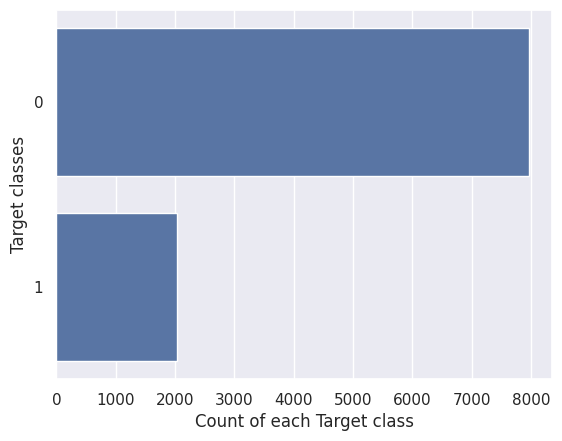

In [14]:
sns.countplot(y=churn_data_encoded.Exited ,data=churn_data_encoded)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

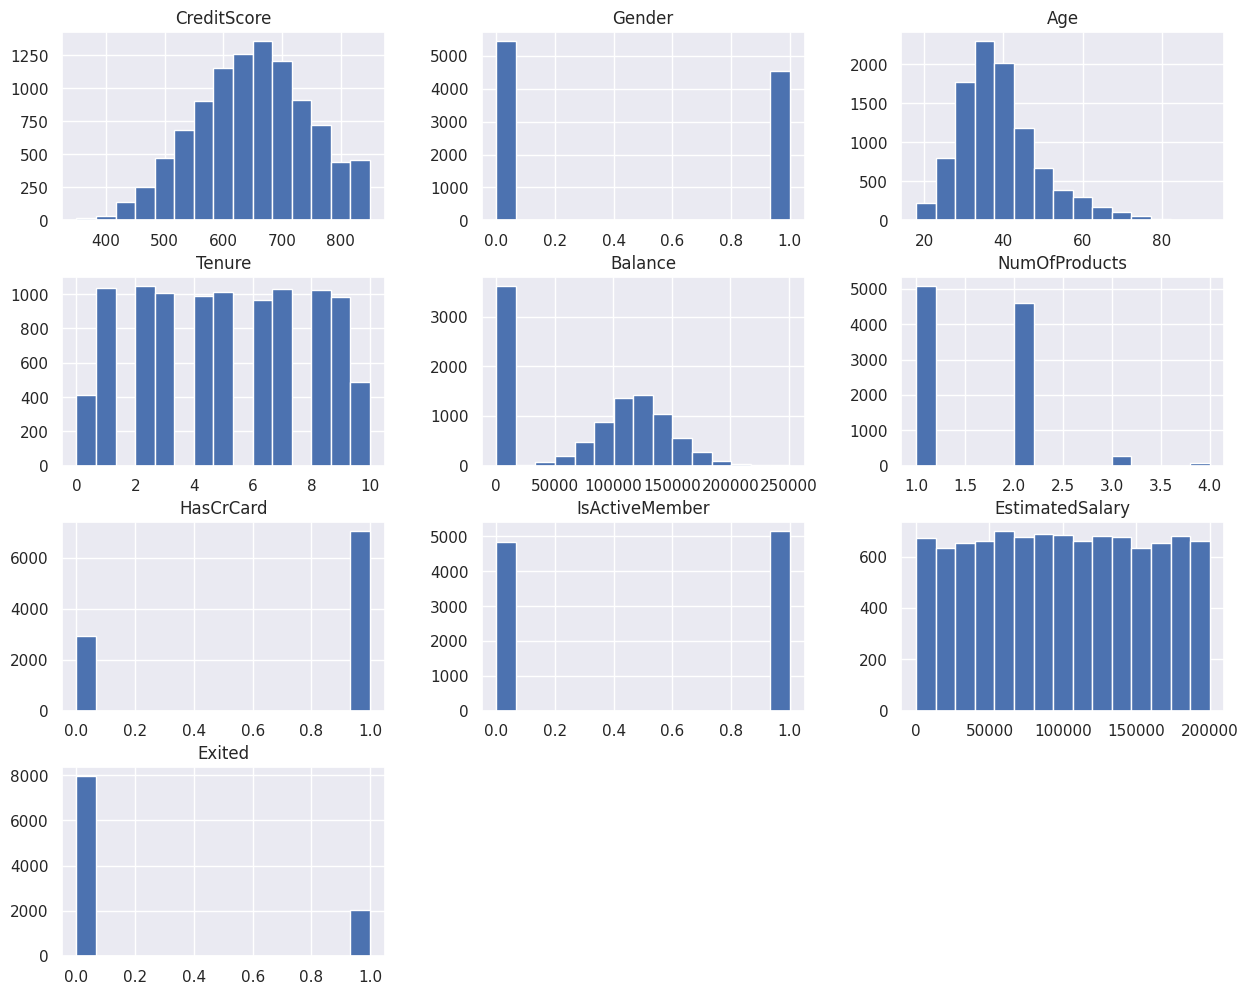

In [15]:
churn_data_encoded.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

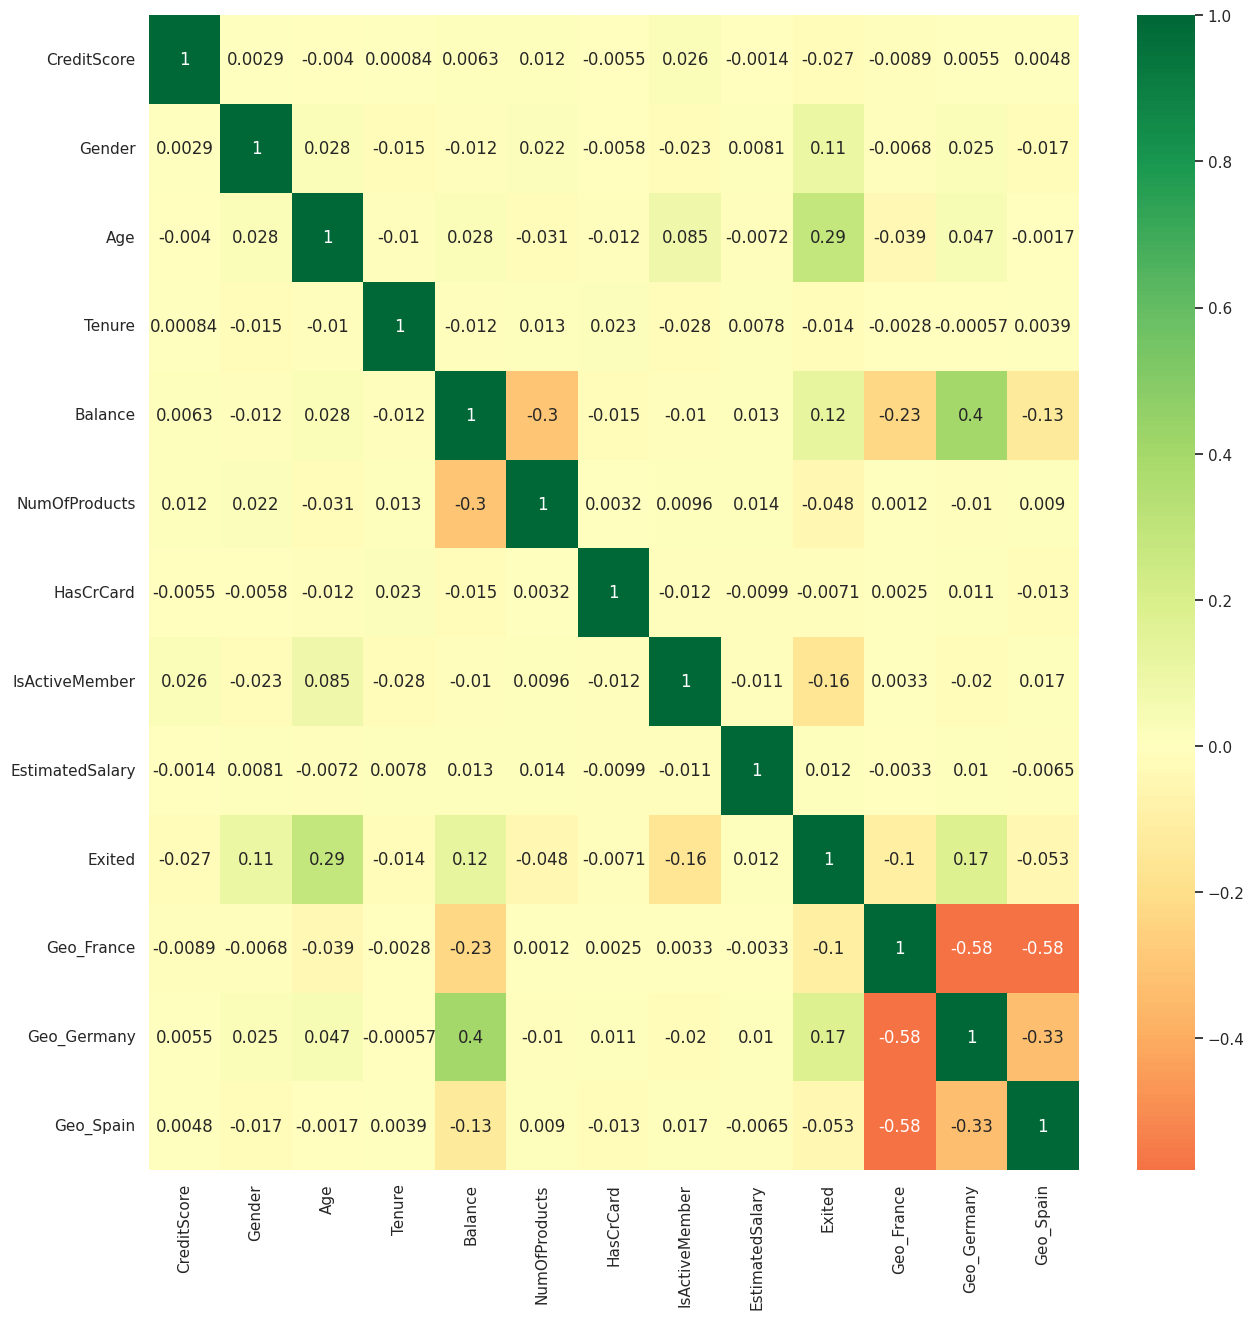

In [16]:
plt.figure(figsize=(15,15))
p=sns.heatmap(churn_data_encoded.corr(), annot=True,cmap='RdYlGn',center=0)

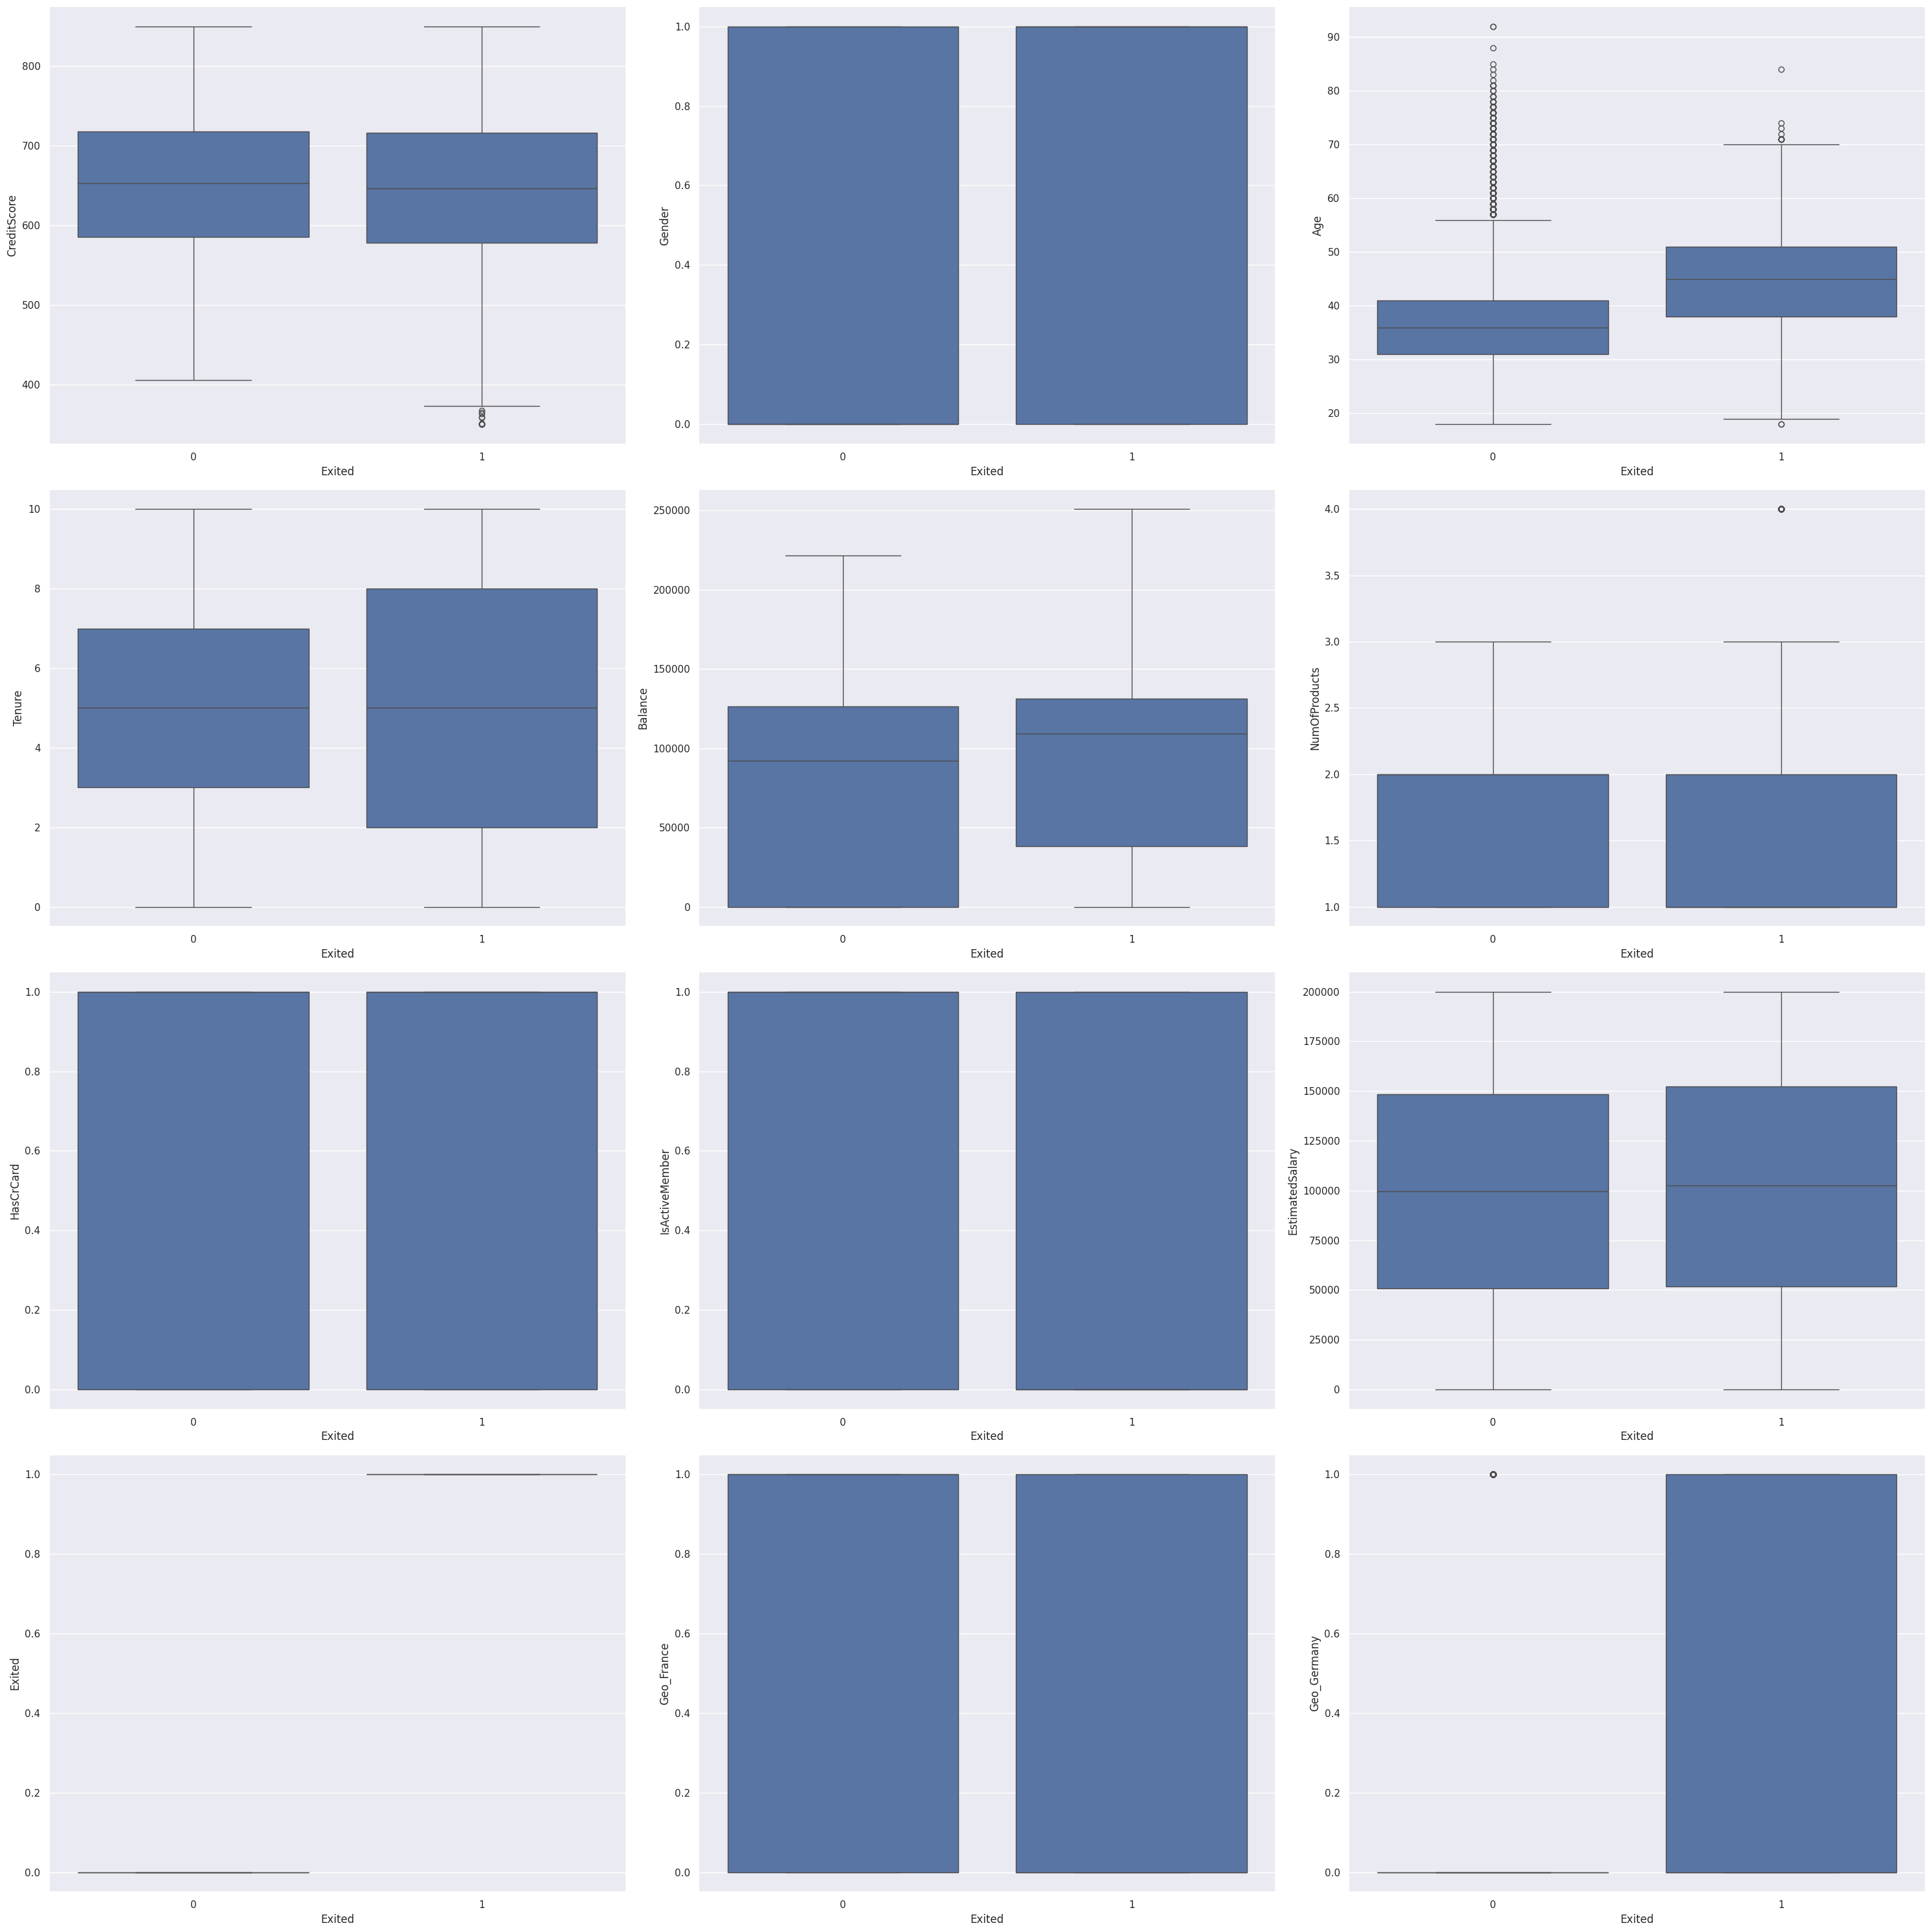

In [17]:
fig,ax = plt.subplots(nrows = 4, ncols=3, figsize=(30,30))
row = 0
col = 0
for i in range(len(churn_data_encoded.columns) -1):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = churn_data_encoded['Exited'], y = churn_data_encoded[churn_data_encoded.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

In [18]:
X = churn_data_encoded.drop(['Exited'],axis=1)
y = churn_data_encoded.Exited

In [19]:
X.head(10)

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_France,Geo_Germany,Geo_Spain
RowNumber,,,,,,,,,,,,
1,619,1,42,2,0.00,1,1,1,101348.88,True,False,False
2,608,1,41,1,83807.86,1,0,1,112542.58,False,False,True
3,502,1,42,8,159660.80,3,1,0,113931.57,True,False,False
4,699,1,39,1,0.00,2,0,0,93826.63,True,False,False
5,850,1,43,2,125510.82,1,1,1,79084.10,False,False,True
6,645,0,44,8,113755.78,2,1,0,149756.71,False,False,True
7,822,0,50,7,0.00,2,1,1,10062.80,True,False,False
8,376,1,29,4,115046.74,4,1,0,119346.88,False,True,False
9,501,0,44,4,142051.07,2,0,1,74940.50,True,False,False


In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [21]:
# Feature Scaling because yes we don't want one independent variable dominating the other and it makes computations easy
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [22]:
# sequential model to initialise our ann and dense module to build the layers
from keras.models import Sequential
from keras.layers import Dense

In [23]:
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN | means applying SGD on the whole ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


670/670 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8356 - loss: 0.3969
Train score: 0.39726340770721436
Train accuracy: 0.8346268534660339
104/104 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step
********************
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8428 - loss: 0.3890
Test score: 0.4008042514324188
Test accuracy: 0.8396969437599182


<a id='11'></a>
# 11. Evaluation Metrics

Text(0.5, 19.049999999999997, 'Predicted label')

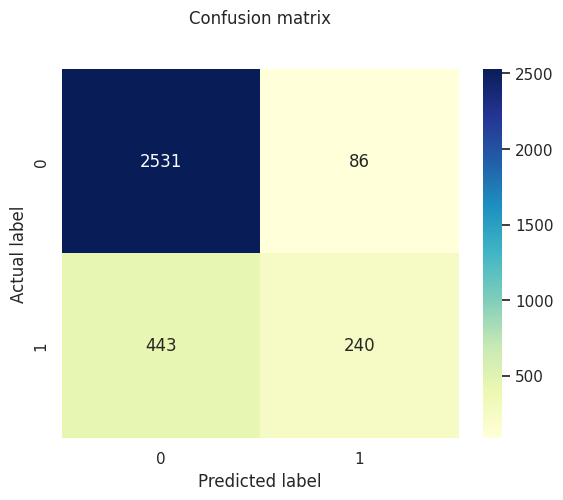

In [24]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [25]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.85      0.97      0.91      2617
           1       0.74      0.35      0.48       683

    accuracy                           0.84      3300
   macro avg       0.79      0.66      0.69      3300
weighted avg       0.83      0.84      0.82      3300



104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


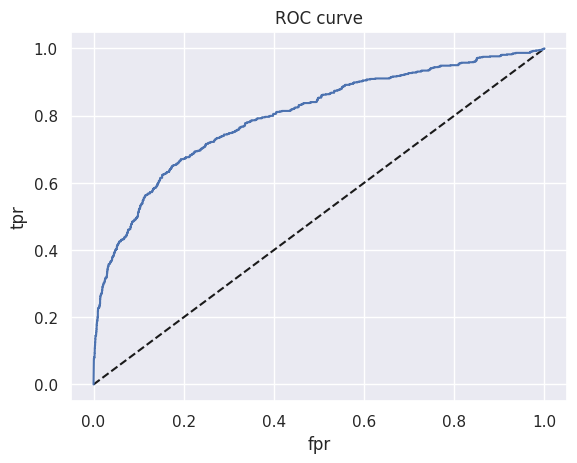

In [26]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [27]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

np.float64(0.7983026847210855)

<a id='12'></a>
# 12. Evaluation of Multiple Training Instances

In [32]:
# Part 4 - Evaluating, Improving and Tuning the ANN

# Evaluating the ANN manually using StratifiedKFold
from sklearn.model_selection import StratifiedKFold
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

def build_classifier():
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

# Define cross-validation parameters
n_splits = 10
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

accuracies = []

# Perform cross-validation
for fold, (train_index, val_index) in enumerate(skf.split(X_train, y_train)):
    print(f"Fold {fold+1}/{n_splits}")

    # Split data for the current fold
    X_train_fold, X_val_fold = X_train[train_index], X_train[val_index]
    y_train_fold, y_val_fold = y_train.iloc[train_index], y_train.iloc[val_index] # Use .iloc for pandas Series

    # Build and compile the model
    classifier = build_classifier()

    # Train the model (verbose=0 to reduce output)
    classifier.fit(X_train_fold, y_train_fold, batch_size = 10, epochs = 100, verbose=0)

    # Evaluate the model
    score, acc = classifier.evaluate(X_val_fold, y_val_fold, verbose=0)
    print(f"  Validation Accuracy: {acc}")
    accuracies.append(acc)

mean = np.mean(accuracies)
variance = np.std(accuracies)

Fold 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Validation Accuracy: 0.8462686538696289
Fold 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Validation Accuracy: 0.8298507332801819
Fold 3/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Validation Accuracy: 0.825373113155365
Fold 4/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Validation Accuracy: 0.8313432931900024
Fold 5/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Validation Accuracy: 0.8373134136199951
Fold 6/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Validation Accuracy: 0.8462686538696289
Fold 7/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Validation Accuracy: 0.8283582329750061
Fold 8/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Validation Accuracy: 0.8313432931900024
Fold 9/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Validation Accuracy: 0.8522388339042664
Fold 10/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Validation Accuracy: 0.841791033744812


In [35]:
print('Mean accuracy score of 10 different models using Kfold cross validation: {}'.format(mean))
print('Standard Deviation of accuracy score of 10 different models using Kfold cross validation: {}'.format(variance))

Mean accuracy score of 10 different models using Kfold cross validation: 0.8370149254798889
Standard Deviation of accuracy score of 10 different models using Kfold cross validation: 0.008672146597730468


#### Deviation is very low so I'd say that it is unlikely to be an overfitted model. With different training sets it got the mean with all training results is still very close to the above model.

<a id='13'></a>
# 13. Improving ANN with Dropout layer

#### Dropout Regularization is used to reduce overfitting if needed.

#### p is the fraction of input units to drop. If suppose there are ten neurons from a layer and p is 0.1 then one of the neurons would be disabled and its output would not be sent to the further layer.
#### It is advisable to start with p 0.1 and move to higher values when in case the overfitting problem persists. Also going over 0.5 is not advisable generally because it may cause underfitting as most of the neurons are disabled.


In [34]:
# Improving the ANN
from keras.layers import Dropout
classifier = Sequential()
# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
classifier.add(Dropout(rate = 0.1))

# Adding the second hidden layer
classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
classifier.add(Dropout(rate = 0.1))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100,verbose = 0)

# Part 3 - Making predictions and evaluating the model

score, acc = classifier.evaluate(X_train, y_train,
                            batch_size=10)
print('Train score:', score)
print('Train accuracy:', acc)
# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

print('*'*20)
score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=10)
print('Test score:', score)
print('Test accuracy:', acc)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


670/670 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8628 - loss: 0.3478
Train score: 0.3504540026187897
Train accuracy: 0.8594030141830444
104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
********************
330/330 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8588 - loss: 0.3462
Test score: 0.35411614179611206
Test accuracy: 0.8566666841506958


Text(0.5, 19.049999999999997, 'Predicted label')

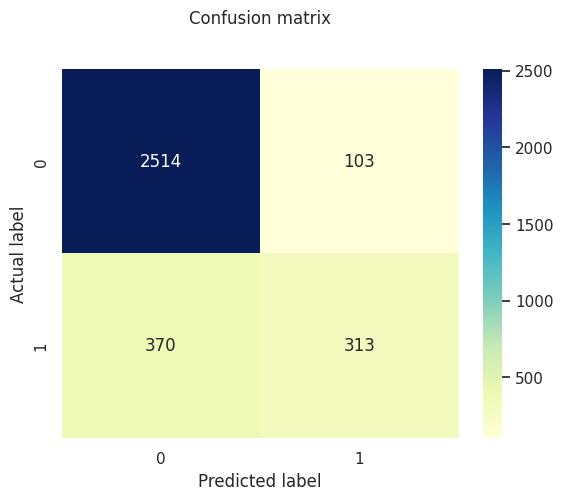

In [36]:
p = sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [37]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.96      0.91      2617
           1       0.75      0.46      0.57       683

    accuracy                           0.86      3300
   macro avg       0.81      0.71      0.74      3300
weighted avg       0.85      0.86      0.84      3300



104/104 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step


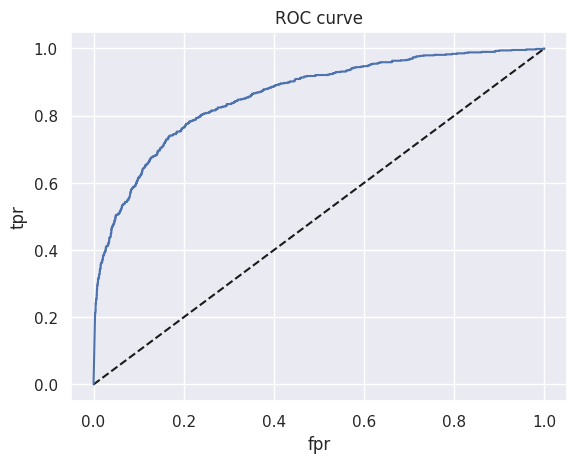

In [39]:
from sklearn.metrics import roc_curve
y_pred_proba = classifier.predict(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='ANN')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('ROC curve')
plt.show()

In [40]:
#Area under ROC curve
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

np.float64(0.8590324217541461)

<a id='14'></a>
# 14. Tuning the ANN

#### Let's test 2 values of the batch size and we're gonna try 25 and 32. So why 25 and 32? Well, that's based on my experience and that's also common practice to take powers of 2. Well, you can try other values of the batch size as well.

In [48]:
# Tuning the ANN manually
from keras.models import Sequential
from keras.layers import Dense
import numpy as np

def build_classifier(optimizer):
    classifier = Sequential()
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 12))
    classifier.add(Dense(units = 6, kernel_initializer = 'uniform', activation = 'relu'))
    classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))
    classifier.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
    return classifier

parameters = {'batch_size': [25, 32],
              'epochs': [100, 200],
              'optimizer': ['adam', 'rmsprop']}

best_accuracy = -1
best_parameters = {}

# Manual Grid Search
for batch_size in parameters['batch_size']:
    for epochs in parameters['epochs']:
        for optimizer in parameters['optimizer']:
            print(f"Training with batch_size={batch_size}, epochs={epochs}, optimizer={optimizer}")

            # Build and compile the model
            classifier = build_classifier(optimizer)

            # Train the model
            classifier.fit(X_train, y_train, batch_size = batch_size, epochs = epochs, verbose=0)

            # Evaluate the model on the test set (or use cross-validation here for a more robust evaluation)
            score, acc = classifier.evaluate(X_test, y_test, verbose=0)
            print(f"  Test Accuracy: {acc}")

            # Check if this is the best model
            if acc > best_accuracy:
                best_accuracy = acc
                best_parameters = {'batch_size': batch_size, 'epochs': epochs, 'optimizer': optimizer}

print("\nManual Grid Search Complete.")
best_parameters_manual = best_parameters
best_accuracy_manual = best_accuracy

Training with batch_size=25, epochs=100, optimizer=adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Test Accuracy: 0.8393939137458801
Training with batch_size=25, epochs=100, optimizer=rmsprop


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Test Accuracy: 0.8403030037879944
Training with batch_size=25, epochs=200, optimizer=adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Test Accuracy: 0.8381817936897278
Training with batch_size=25, epochs=200, optimizer=rmsprop


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Test Accuracy: 0.8436363339424133
Training with batch_size=32, epochs=100, optimizer=adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Test Accuracy: 0.8357575535774231
Training with batch_size=32, epochs=100, optimizer=rmsprop


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Test Accuracy: 0.838787853717804
Training with batch_size=32, epochs=200, optimizer=adam


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Test Accuracy: 0.8430302739143372
Training with batch_size=32, epochs=200, optimizer=rmsprop


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


  Test Accuracy: 0.8406060338020325

Manual Grid Search Complete.


In [49]:
print('Best Parameters after tuning: {}'.format(best_parameters_manual))
print('Best Accuracy after tuning: {}'.format(best_accuracy_manual))

Best Parameters after tuning: {'batch_size': 25, 'epochs': 200, 'optimizer': 'rmsprop'}
Best Accuracy after tuning: 0.8436363339424133


In [ ]:
!pip install scikeras

In [ ]:
!pip install scikit-learn==1.1.3

In [29]:
!pip install scikit-learn==1.0.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 84.8 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  error: subprocess-exited-with-error
  
  × Preparing metadata (pyproject.toml) did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (pyproject.toml) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [45]:
!pip install --upgrade --force-reinstall scikeras==0.13.0

  Using cached scikeras-0.13.0-py3-none-any.whl.metadata (3.1 kB)
  Using cached keras-3.10.0-py3-none-any.whl.metadata (6.0 kB)
  Using cached scikit_learn-1.7.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (17 kB)
  Using cached absl_py-2.3.0-py3-none-any.whl.metadata (2.4 kB)
  Using cached numpy-2.3.1-cp311-cp311-manylinux_2_28_x86_64.whl.metadata (62 kB)
  Using cached rich-14.0.0-py3-none-any.whl.metadata (18 kB)
  Using cached namex-0.1.0-py3-none-any.whl.metadata (322 bytes)
  Using cached h5py-3.14.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (2.7 kB)
  Using cached optree-0.16.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (30 kB)
  Using cached ml_dtypes-0.5.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (21 kB)
  Using cached packaging-25.0-py3-none-any.whl.metadata (3.3 kB)
  Using cached scipy-1.16.0-cp311-cp311-manylinux2014_x86_64.manylinux_2_17_x86_64.whl.metadata (61 kB)
  Us